## I. Data Preparation and Exploration

---

1. First, I import essential libraries (pandas, matplotlib, sklearn) that we’ll need for data analysis and visualization.

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Matplotlib is building the font cache; this may take a moment.


2. Then I load the CSV file into a pandas DataFrame and examine the first few rows to understand the data structure.  

In [9]:
# Read the dataset
df = pd.read_csv('../data/houseprice.csv')

3. I check basic information about the dataset including data types and missing values to ensure data quality.

In [11]:
# Display the first few rows to understand the data
print("First 5 rows of selected columns:")
print(df[[df.columns[0], df.columns[-1]]].head())

First 5 rows of selected columns:
   crime rate  Median Home Value
0     0.00632               24.0
1     0.02731               21.6
2     0.02729               34.7
3     0.03237               33.4
4     0.06905               36.2


In [13]:
# Get basic information about the dataset
print("\nDataset information for selected columns:")
print(df[[df.columns[0], df.columns[-1]]].info())


Dataset information for selected columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   crime rate         506 non-null    float64
 1   Median Home Value  506 non-null    float64
dtypes: float64(2)
memory usage: 8.0 KB
None


In [14]:
# Check for missing values
print("\nMissing values in selected columns:")
print(df[[df.columns[0], df.columns[-1]]].isnull().sum())


Missing values in selected columns:
crime rate           0
Median Home Value    0
dtype: int64


4. A statistical summary provides key metrics (mean, min, max, etc.) to understand the distribution of our variables.

In [15]:
# Get statistical summary of the data
print("\nStatistical summary for selected columns:")
print(df[[df.columns[0], df.columns[-1]]].describe())


Statistical summary for selected columns:
       crime rate  Median Home Value
count  506.000000         506.000000
mean     3.613524          22.532806
std      8.601545           9.197104
min      0.006320           5.000000
25%      0.082045          17.025000
50%      0.256510          21.200000
75%      3.677083          25.000000
max     88.976200          50.000000


## II. Visualization

---

1. Create scatter plots to visualize the relationship between crime rate and median home value. The first plot shows all data points

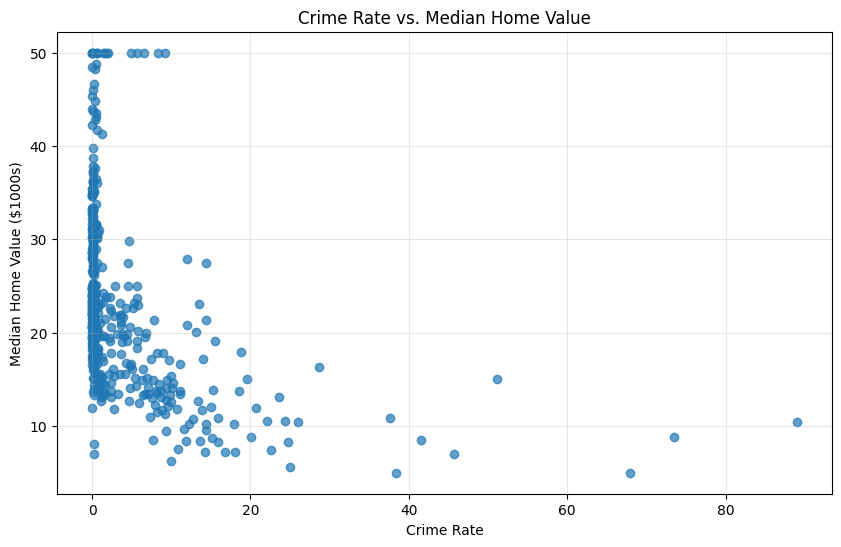

In [16]:
# Visualize the relationship between crime rate and median home value
plt.figure(figsize=(10, 6))
plt.scatter(df['crime rate'], df['Median Home Value'], alpha=0.7)
plt.title('Crime Rate vs. Median Home Value')
plt.xlabel('Crime Rate')
plt.ylabel('Median Home Value ($1000s)')
plt.grid(True, alpha=0.3)
plt.show()

2. The second zooms in on crime rates between 0-2 to better see where most data points cluster.

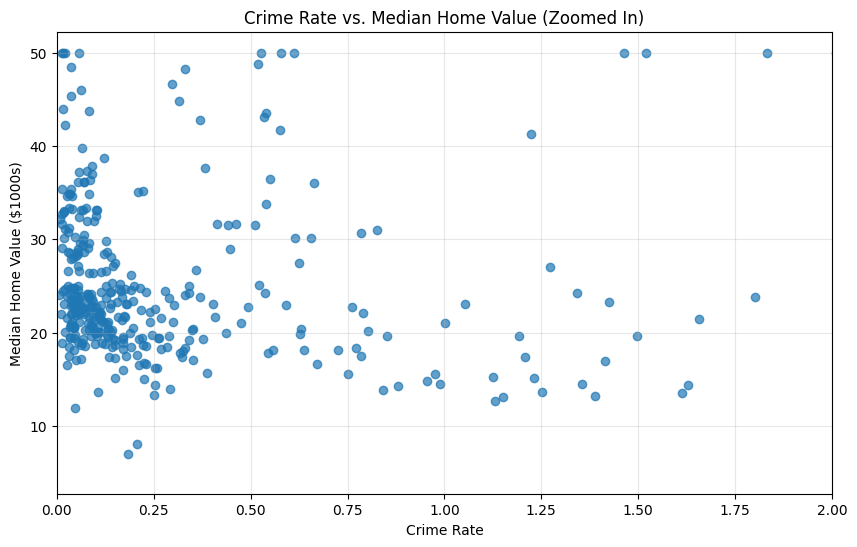

In [17]:
# Let's also examine the relationship with a smaller x-axis range to see the majority of the data better
plt.figure(figsize=(10, 6))
plt.scatter(df['crime rate'], df['Median Home Value'], alpha=0.7)
plt.title('Crime Rate vs. Median Home Value (Zoomed In)')
plt.xlabel('Crime Rate')
plt.ylabel('Median Home Value ($1000s)')
plt.xlim(0, 2)  # Limiting to crime rates between 0 and 2
plt.grid(True, alpha=0.3)
plt.show()

3. Calculate the correlation coefficient to quantify the relationship strength between the variables.

In [18]:
# Compute correlation coefficient to quantify the relationship
corr = df['crime rate'].corr(df['Median Home Value'])
print(f"\nCorrelation coefficient between crime rate and median home value: {corr:.4f}")


Correlation coefficient between crime rate and median home value: -0.3883


# III. Manual Linear Regression

---

1. Calculate the mean of both variables as preparation for the regression formula.

In [19]:
# Step 1: Calculate means of both variables
mean_crime = df['crime rate'].mean()
mean_home_value = df['Median Home Value'].mean()
print(f"\nMean crime rate: {mean_crime:.4f}")
print(f"Mean median home value: {mean_home_value:.4f}")


Mean crime rate: 3.6135
Mean median home value: 22.5328


2. Then I compute the slope (β₁) using the formula: Σ[(x-x̄)(y-ȳ)] / Σ[(x-x̄)²]
- This involves calculating the sum of products of deviations for the numerator
- And the sum of squared deviations of x for the denominator

In [20]:
# Step 2: Calculate the slope (β₁) using the formula: Σ[(x-x̄)(y-ȳ)] / Σ[(x-x̄)²]
# Calculate numerator: Σ[(x-x̄)(y-ȳ)]
numerator = sum((df['crime rate'] - mean_crime) * (df['Median Home Value'] - mean_home_value))
# Calculate denominator: Σ[(x-x̄)²]
denominator = sum((df['crime rate'] - mean_crime) ** 2)
# Calculate slope
slope = numerator / denominator
print(f"\nNumerator (sum of (x-x̄)(y-ȳ)): {numerator:.4f}")
print(f"Denominator (sum of (x-x̄)²): {denominator:.4f}")
print(f"Slope (β₁): {slope:.4f}")


Numerator (sum of (x-x̄)(y-ȳ)): -15512.8465
Denominator (sum of (x-x̄)²): 37363.2220
Slope (β₁): -0.4152


3. Calculate the y-intercept (β₀) using: ȳ - β₁x̄

In [21]:
# Step 3: Calculate the y-intercept (β₀) using the formula: ȳ - β₁x̄
intercept = mean_home_value - slope * mean_crime
print(f"Intercept (β₀): {intercept:.4f}")

Intercept (β₀): 24.0331


4. With these values, I construct the full regression equation: Median Home Value = intercept + slope × Crime Rate

In [22]:
# Step 4: Write the regression equation
print(f"\nRegression equation: Median Home Value = {intercept:.4f} + ({slope:.4f} × Crime Rate)")


Regression equation: Median Home Value = 24.0331 + (-0.4152 × Crime Rate)


# IV. Answering the Question

---

1. To find the impact of a 0.01 increase in crime rate, I multiply the slope by 0.01
2. The result shows that for every 0.01 increase in crime rate, the median home value decreases by about $4.15

In [23]:
impact = slope * 0.01
print(f"\nFor every 0.01 increase in crime rate, the median home value changes by ${impact*1000:.2f}")


For every 0.01 increase in crime rate, the median home value changes by $-4.15


# V. Verification with scikit-learn

---

1. I use scikit-learn's LinearRegression to verify our manual calculations

In [24]:
X = df['crime rate'].values.reshape(-1, 1)
y = df['Median Home Value'].values
reg = LinearRegression()
reg.fit(X, y)
print("\nUsing scikit-learn:")
print(f"Slope: {reg.coef_[0]:.4f}")
print(f"Intercept: {reg.intercept_:.4f}")
print(f"For every 0.01 increase in crime rate, the median home value changes by ${reg.coef_[0]*0.01*1000:.2f}")


Using scikit-learn:
Slope: -0.4152
Intercept: 24.0331
For every 0.01 increase in crime rate, the median home value changes by $-4.15


2. I plot the regression line on top of our scatter plot to visualize the relationship

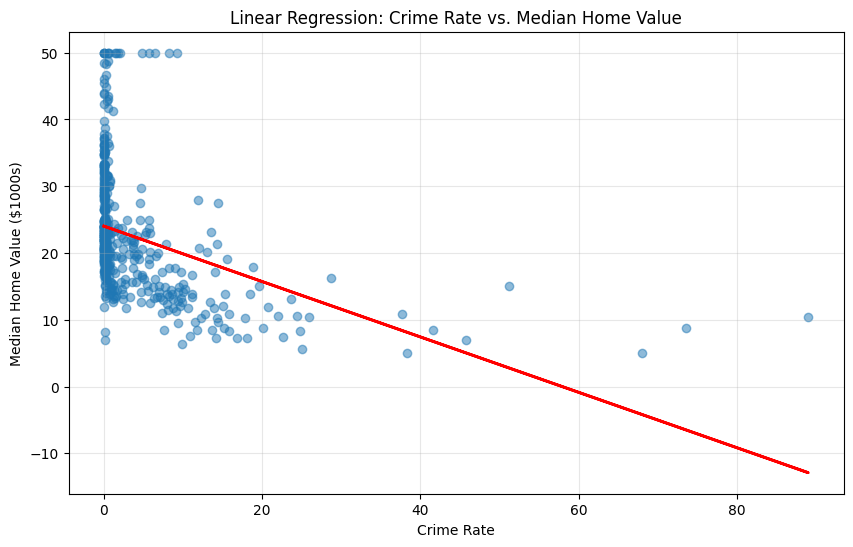

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(df['crime rate'], df['Median Home Value'], alpha=0.5)
plt.plot(df['crime rate'], reg.predict(X), color='red', linewidth=2)
plt.title('Linear Regression: Crime Rate vs. Median Home Value')
plt.xlabel('Crime Rate')
plt.ylabel('Median Home Value ($1000s)')
plt.grid(True, alpha=0.3)
plt.show()

3. Finally, I calculate R-squared to determine how well crime rate explains the variance in home values

In [26]:
r_squared = reg.score(X, y)
print(f"\nR-squared: {r_squared:.4f}")
print(f"This means that {r_squared*100:.2f}% of the variance in median home values can be explained by crime rate.")


R-squared: 0.1508
This means that 15.08% of the variance in median home values can be explained by crime rate.
